In [1]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np

from clones.annotation.mixtures import UnivariateMixture, BivariateMixture

%matplotlib inline

# Define ground truth model

In [2]:
mu = [1., 2.]
sigma = 2.
weights = [.5, .5]
generating_model = UnivariateMixture.from_parameters(mu, sigma, weights)

Text(0.5,1,'Ground truth')

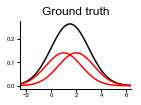

In [3]:
fig, ax = plt.subplots(figsize=(2., 1.25))
generating_model.plot(ax=ax, log=True, pdf_color='k', component_color='r')
ax.set_title ('Ground truth')

# Generate sample

In [4]:
N = 1000
m = 10
sample = generating_model.multi_sample(N, m=m)

### Bivariate model

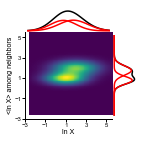

In [5]:
bivariate_model = BivariateMixture.from_sample(sample, n=2)
fig = bivariate_model.visualize()

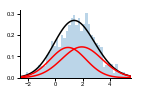

In [7]:
fig, ax = plt.subplots(figsize=(2., 1.25))
generating_model.plot_data(ax=ax, log=True, alpha=0.3)
bivariate_model[0].plot(log=True, ax=ax)

### Univariate model

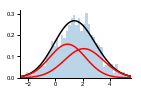

In [8]:
univariate_model = UnivariateMixture.from_sample(sample[:, 0], n=2)

fig, ax = plt.subplots(figsize=(2., 1.25))
generating_model.plot_data(ax=ax, log=True, alpha=0.3)
univariate_model.plot(ax=ax, log=True)

Text(0.5,1,'Univariate fit')

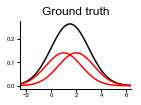

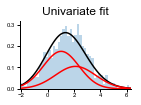

In [10]:
N = 500

fig, ax = plt.subplots(figsize=(2., 1.25))
generating_model.plot(ax=ax, log=True, pdf_color='k', component_color='r')
ax.set_title ('Ground truth')

sample = generating_model.sample(N)
univariate_model = UnivariateMixture.from_sample(sample[:, 0], n=2)
    
fig, ax = plt.subplots(figsize=(2., 1.25))
generating_model.plot_data(ax=ax, log=True, alpha=0.3)
univariate_model.plot(ax=ax, log=True)
ax.set_title('Univariate fit')

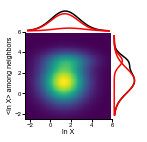

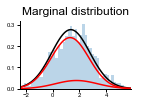

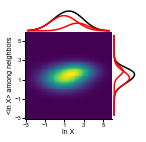

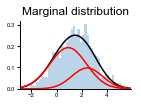

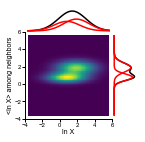

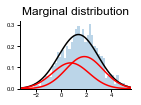

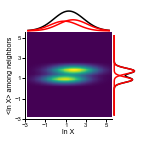

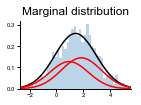

In [13]:
for m in [1, 5, 10, 25]:

    sample = generating_model.multi_sample(N, m=m)
    
    # bivariate fit
    bivariate_model = BivariateMixture.from_sample(sample, n=2)
    fig = bivariate_model.visualize()
    
    # marginal distribution
    fig, ax = plt.subplots(figsize=(2., 1.25))
    generating_model.plot_data(ax=ax, log=True, alpha=0.3)
    bivariate_model[0].plot(log=True, ax=ax)
    ax.set_title('Marginal distribution')    

In [14]:
univariate_model.means

array([1.01934196, 2.10881256])

In [ ]:
univariate_model.predict()

In [ ]:
univariate_model.predict_proba

In [30]:
for comp in univariate_model.components:
    print(comp.cdf([1,2,4]))

[0.49431007 0.76520615 0.9860246 ]
[0.2345907  0.47168664 0.89149744]


In [ ]:
    # @property
    # def component_cdfs(self):
    #     """ Returns CDF of each component over support. """
    #     cdf = [self.evaluate_cdf(d, self.support) for d in self.components]
    #     return np.vstack(cdf)

In [ ]:
univariate_model.cd

In [15]:
def default_figure(func):
    """ Decorator for creating axis. """
    def wrapper(*args, ax=None, figsize=(2., 1.25), **kwargs):
        if ax is None:
            fig, ax = plt.subplots(figsize=figsize)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
        func(*args, ax=ax, **kwargs)
    return wrapper


In [24]:
@default_figure
def plot(x, y, ax=None):
    ax.plot(x, y)

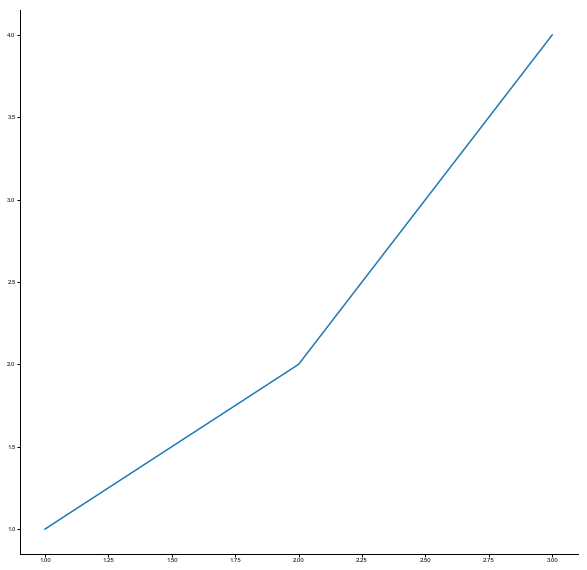

In [25]:
plot([1,2,3], [1,2,4], figsize=(10, 10))